Ref: https://typewind.github.io/2017/09/29/radar-chart/

In [138]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Plot chart

In [179]:
def plot_chart(attributes, marks, title):
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

    # set the radians
    radians = np.linspace(0, 2*np.pi, len(attributes), endpoint=False); #radians in radian

    # join the dots
    marks = np.concatenate((marks,[marks[0]])); #marks
    radians = np.concatenate((radians,[radians[0]])); #radians
    
    fig = plt.figure(figsize=[7,7])
    ax = fig.add_subplot(111, polar=True)   

    # Draw the plot
    _ = ax.plot(radians, marks, 'o-', linewidth=2)  

    # Fill the area
    _ = ax.fill(radians, marks, alpha=0.25)  

    # Set labels
    _ = ax.set_thetagrids(radians * 180/np.pi, attributes)  

    _ = ax.set_title(title)
    _ = ax.set_rlim(0,100)
    ax.grid(True)
    
    return

## Calculate area

In [140]:
def get_trianlge_area(radian, radius_1, radius_2):
    import math
    
    if (radian >= 0) & (radius_1 >= 0) & (radius_2 >= 0):
        area = 1/2 * radius_1 * radius_2 * abs(math.sin(radian))
    return area

In [141]:
def get_irr_polygon_area(radian, radius_1, radius_2):
    area = 0
    for rad, r1, r2 in zip(radian, radius_1, radius_2):
        #print(rad, r1, r2)
        area = area + get_trianlge_area(rad, r1, r2); #print('area: ', area)
    return area
    

### Parameters and Control

In [156]:
attributes = ['wisedom', 'effectiveness', 'technical', 'alignment', 'coalition', 'leadership']

radians_control = np.repeat(2*np.pi/len(attributes), len(attributes)); radians_control

radius_control = np.repeat(100, len(attributes)); radius_control

area_control = get_irr_polygon_area(radians_control, radius_control, radius_control); area_control

array([1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755,
       1.04719755])

array([100, 100, 100, 100, 100, 100])

25980.76211353316

### Score and Report

In [188]:
def score_and_report(who, marks, attributes, area_control):
    
    area = get_irr_polygon_area(radians_control, marks, np.roll(marks, 1))

    normalised_score = area/area_control; 
    print(who, ' score is: ', round(normalised_score,2))

    plot_chart(attributes, marks, who)
    
    return

### Individual score

attributes = ['wisedom', 'effectiveness', 'technical', 'alignment', 'coalition', 'leadership']

Doctor Who  score is:  0.36


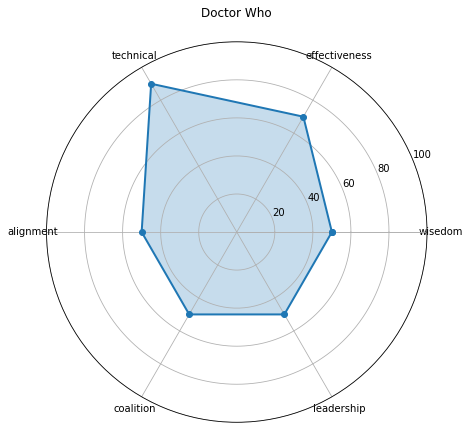

In [192]:
attributes = ['wisedom', 'effectiveness', 'technical', 'alignment', 'coalition', 'leadership']
who = 'Doctor Who'
marks = [50, 70, 90, 50, 50, 50]

score_and_report(who, marks, attributes, area_control)

Zero Zach  score is:  0.0


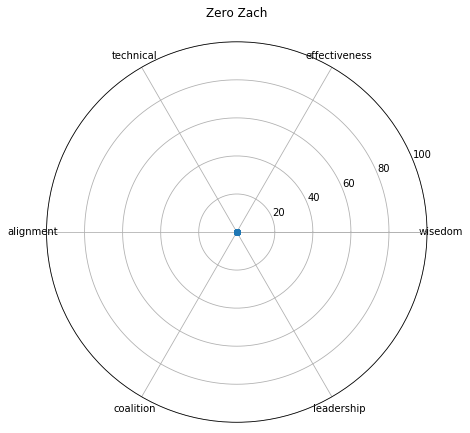

In [190]:
attributes = ['wisedom', 'effectiveness', 'technical', 'alignment', 'coalition', 'leadership']
who = 'Zero Zach'
marks = [0, 0, 0, 0, 0, 0]

score_and_report(who, marks, attributes, area_control)

Maximus Max  score is:  1.0


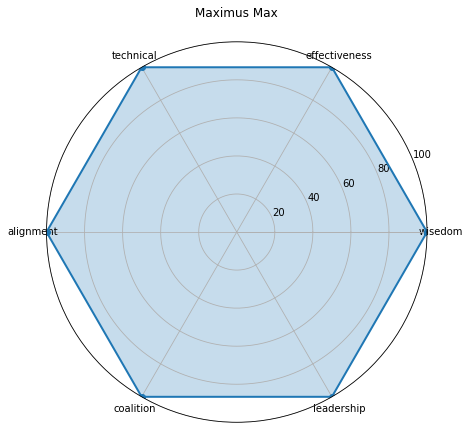

In [191]:
attributes = ['wisedom', 'effectiveness', 'technical', 'alignment', 'coalition', 'leadership']
who = 'Maximus Max'
marks = [100, 100, 100, 100, 100, 100]

score_and_report(who, marks, attributes, area_control)